Румянцев Олег ИУ5-22М Вариант№ 9

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


In [2]:
hap_report_dataset = pd.read_csv('/kaggle/input/world-happiness-report-2021/world-happiness-report.csv')

In [4]:
hap_report_dataset.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [6]:
hap_report_dataset.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


# Задача №9.

Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения "хвостом распределения".

In [31]:
missing = hap_report_dataset.isna().sum()
missing

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [27]:
missing[missing > 0].keys()

Index(['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

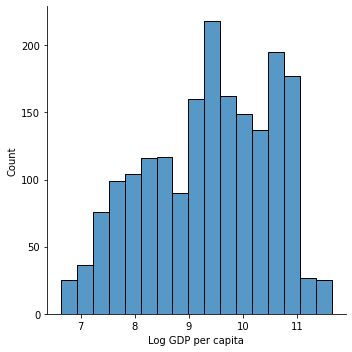

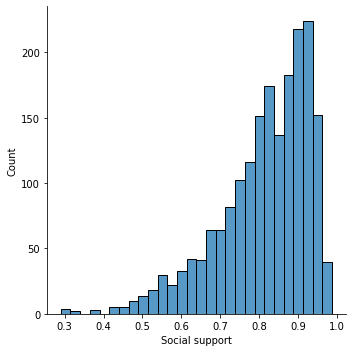

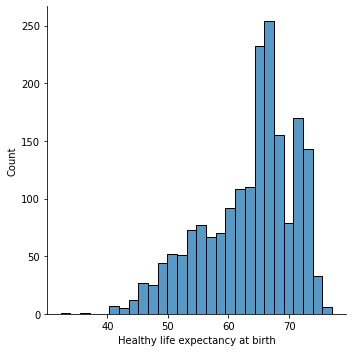

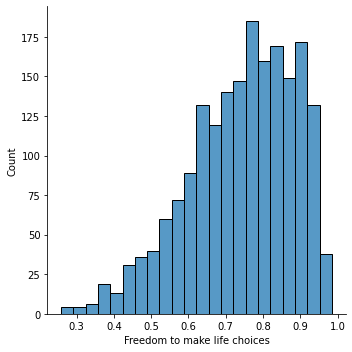

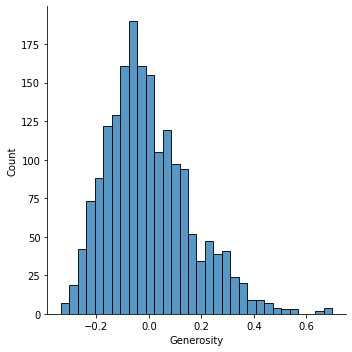

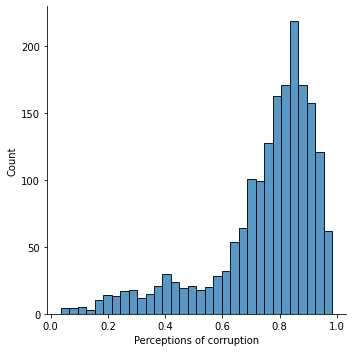

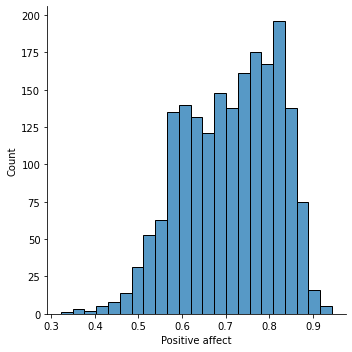

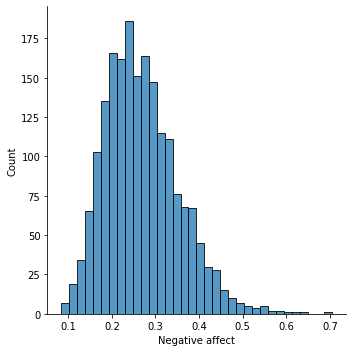

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


for key in missing[missing > 0].keys():
    sns.displot(hap_report_dataset, x=key)
# sns.displot(hap_report_dataset, x="Social support")
# sns.displot(hap_report_dataset, x="Healthy life expectancy at birth")
# sns.displot(hap_report_dataset, x="Positive affect")

In [44]:
k = 1.5
generosity_q3 = hap_report_dataset['Generosity'].quantile(0.75)
generosity_q1 = hap_report_dataset['Generosity'].quantile(0.25)
generosity_excess = generosity_q3 + k * (generosity_q3 - generosity_q1)
generosity_excess

0.397

In [43]:
hap_report_dataset['Generosity'].describe()

count    1860.000000
mean        0.000103
std         0.162215
min        -0.335000
25%        -0.113000
50%        -0.025500
75%         0.091000
max         0.698000
Name: Generosity, dtype: float64

In [46]:
new_generosity = hap_report_dataset['Generosity'].fillna(generosity_excess)
new_generosity.describe()

count    1949.000000
mean        0.018227
std         0.178830
min        -0.335000
25%        -0.106000
50%        -0.016000
75%         0.115000
max         0.698000
Name: Generosity, dtype: float64

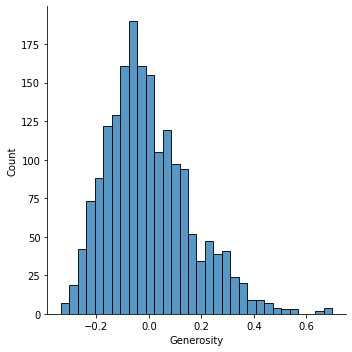

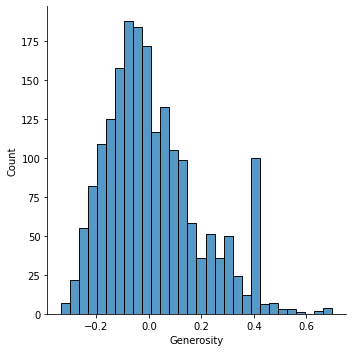

In [47]:
sns.displot(hap_report_dataset, x='Generosity')
sns.displot(new_generosity)

# Задача №29.

Для набора данных проведите удаление константных и псевдоконстантных признаков.

In [66]:
from random import random, randint
import math

nearly_const_data = [math.ceil(random() - 0.9) for _ in range(100)]
const_data = [32 for _ in range(100)]
rnd_data = [randint(1,100) for _ in range(100)]

df = pd.DataFrame({'f1': nearly_const_data, 'f2': const_data, 'f3': rnd_data})
df.describe()

,f1,f2,f3
count,100.000000,100.0,100.000000
mean,0.070000,32.0,58.180000
std,0.256432,0.0,28.500002
min,0.000000,32.0,2.000000
25%,0.000000,32.0,36.000000
50%,0.000000,32.0,63.500000
75%,0.000000,32.0,82.000000
max,1.000000,32.0,100.000000


In [69]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
selector.fit_transform(df)

array([[ 82],
       [ 74],
       [ 38],
       [ 75],
       [ 76],
       [  3],
       [ 65],
       [ 62],
       [  5],
       [ 68],
       [ 56],
       [ 94],
       [ 71],
       [100],
       [ 82],
       [ 52],
       [ 65],
       [ 83],
       [ 85],
       [ 96],
       [ 96],
       [ 74],
       [ 94],
       [ 61],
       [ 74],
       [ 31],
       [ 61],
       [  6],
       [ 46],
       [ 73],
       [ 63],
       [ 53],
       [ 95],
       [ 89],
       [ 68],
       [ 56],
       [ 68],
       [ 20],
       [ 90],
       [ 36],
       [ 20],
       [ 65],
       [  9],
       [ 64],
       [ 69],
       [ 80],
       [ 34],
       [ 36],
       [ 46],
       [  2],
       [ 49],
       [ 53],
       [ 59],
       [ 76],
       [ 18],
       [ 94],
       [ 98],
       [ 92],
       [ 71],
       [ 34],
       [ 85],
       [ 73],
       [  9],
       [ 41],
       [  4],
       [ 55],
       [ 24],
       [ 21],
       [ 85],
       [ 58],
       [ 12],
      